# NB and Logistic Regression Project 

Welcome to NB and Logistic Regression Project! Go ahead and follow the directions below.

**Build a classification model which will recognise the activities through the mobile sensor like walking, walking_upstairs  ,walking_downstairs ,sitting  ,standing,lying.The topic Human Activity recognition is in research and has its own advantages like anomaly detection, for healthy diet maintenance fitness bands are used , measuring stress level ,for monitoring employees ,for heartbeat pulse rate etc. In this project we are going to focus on  the dataset which was carried out through experiments with a group of 30 volunteers wearing a smartphone.The experiments have been video-recorded to label the data manually.The  main motto is to use the dataset and work with the libraries like scikit learn and machine learning related libraries and algorithms while training.**

# <font color='red'>Download and submit only HTML file</font>

# Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv('/content/drive/MyDrive/FAIZAL SHAIKH - human_activity.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# EDA and Basic Data Preprocessing and Preparation [Marks:2]
**If trying auto EDA do it in a different notebook and only highlight important, interesting or unusual pattern that you noticed in the data**

<font color='red'>Give justification for your choices and techniques used for every step</font>

##### 1. Basic information about data

In [37]:
df.info()
rows = df.shape[0]
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


(7352, 563)

The dataframe containes 7352 rows along with 563 columns.

In [38]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#####  2. Knowing the datatypes of the given dataframe

In [40]:
df.dtypes

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

##### 3. Handling missing data

In [41]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'percentage_missing': (df.isnull().sum()/rows)*100})
missing_data

,total_missing,percentage_missing
tBodyAcc-mean()-X,0,0.0
tBodyAcc-mean()-Y,0,0.0
tBodyAcc-mean()-Z,0,0.0
tBodyAcc-std()-X,0,0.0
tBodyAcc-std()-Y,0,0.0
...,...,...
"angle(X,gravityMean)",0,0.0
"angle(Y,gravityMean)",0,0.0
"angle(Z,gravityMean)",0,0.0
subject,0,0.0


There is no column with missing data(empty cells) in the given dataset.

##### 4. Formatting the names of the columns

In [42]:
columns = df.columns
columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [43]:
columns = columns.str.replace('[()]','', regex=True)
columns = columns.str.replace('[-]', '', regex=True)
columns = columns.str.replace('[,]','', regex=True)
df.columns = columns
df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

##### 5. Handling duplicate rows. 

In [44]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity


There are no duplicate rows in the dataset.

#### 6. Activity Count from each user.

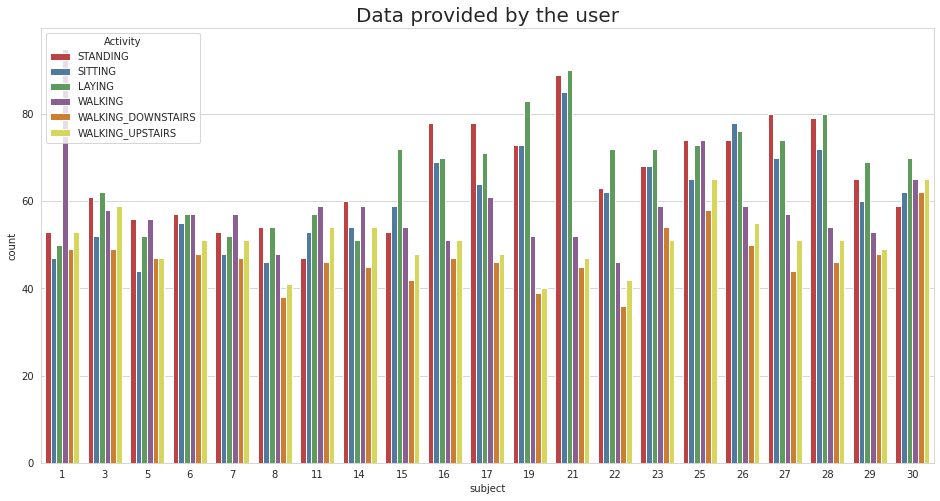

In [45]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by the user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

#### 7. Distribution of the Activities

In [46]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Plotting data
label_counts = df['Activity'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mpl.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Activity Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()

Although there are fluctuations in the label counts, the labels are quite equally distributed.

##### 8. Correlation Plot

In [47]:
df.corr()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
tBodyAccmeanX,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242,0.024181
tBodyAccmeanY,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903,-0.003144
tBodyAccmeanZ,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643,-0.000637
tBodyAccstdX,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825,-0.064345
tBodyAccstdY,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169,-0.115524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
angletBodyGyroJerkMeangravityMean,0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656,0.009340
angleXgravityMean,-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655,0.026137
angleYgravityMean,0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885,-0.009829
angleZgravityMean,0.028242,-0.013903,-0.022643,0.394825,0.433169,0.482828,0.390922,0.431459,0.479751,0.405023,...,0.057831,0.052548,-0.003069,-0.017520,-0.019903,-0.005656,-0.643655,0.594885,1.000000,-0.098712


### Deeper insights from domain knowledge.
#### Stationary and Moving activities

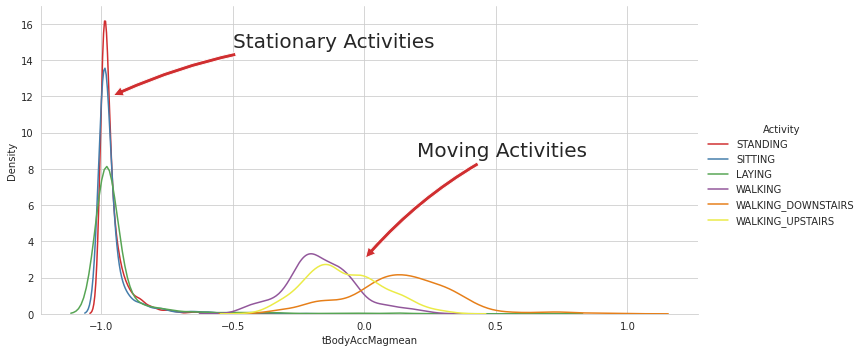

In [48]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(df, hue='Activity', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

#### Distribution of Stationary Activities and Moving Activities.

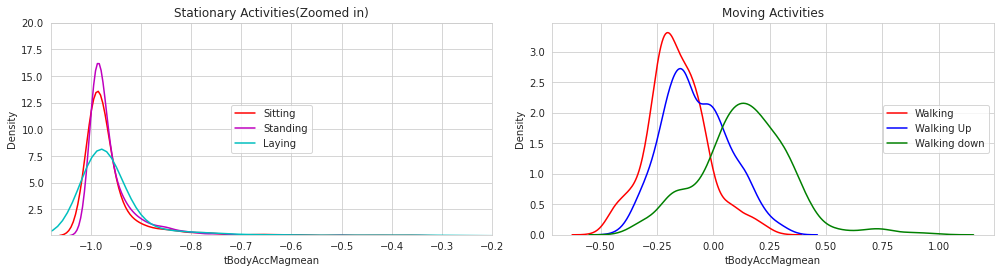

In [49]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = df[df['Activity']== 'WALKING']
df2 = df[df['Activity']== 'WALKING_UPSTAIRS']
df3 = df[df['Activity']== 'WALKING_DOWNSTAIRS']
df4 = df[df['Activity']== 'SITTING']
df5 = df[df['Activity']== 'STANDING']
df6 = df[df['Activity']== 'LAYING']

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

When participants are moving the data is normally distributed with long tails.

##### Magnitude of acceleration can seperate stationary actions from moving activities

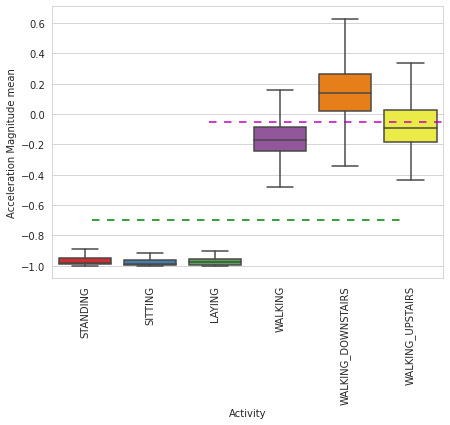

In [50]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.

If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

If tAccMean > 0.0 then the Activity is WalkingDownstairs.

We can classify 75% the Acitivity labels with some errors.

## Null/Outlier Treatment

##### Null treatment

In [51]:
df.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleXgravityMean    0
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
Length: 563, dtype: int64

There are no columns with null values, hence we need not take any measures to overcome them.

##### Outlier treatment using z statistic
Outliers are identified as those points whose z statistic value is greater than the threshold which is usually taken as 3.

In [52]:
updated_df = df
threshold = 3 
rows = updated_df.shape[0]
columns = updated_df.shape[1]
for i in range(0, columns-2):
    median = updated_df.iloc[:, i].median()
    mean = updated_df.iloc[:, i].mean()
    std = updated_df.iloc[:, i].std()
    upper_limit = mean + threshold*std
    lower_limit = mean - threshold*std
    for j in range(0, rows):
        element = updated_df.iloc[j, i] 
        if (element < lower_limit or element > upper_limit):
            updated_df.iloc[j, i] = median
updated_df

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


Here we take the approach of handling outliers by replacing the values of the outliers with the median value of the feature.

## Remove non-Important Features

We are using the correlation matrix to remove the unimportant features using a threshold value.

In [53]:
columns = updated_df.shape[1]
features = updated_df.iloc[:, 0:columns-2]
corr_matrix = features.corr().abs()
corr_matrix

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
tBodyAccmeanX,1.000000,0.031568,0.043916,0.024045,0.003867,0.013895,0.030324,0.006211,0.011131,0.031247,...,0.006030,0.001600,0.003065,0.704682,0.034391,0.036832,0.051810,0.002640,0.014856,0.005313
tBodyAccmeanY,0.031568,1.000000,0.116371,0.056404,0.070269,0.074086,0.057282,0.072637,0.076935,0.051821,...,0.006389,0.002379,0.004881,0.133568,0.049962,0.025535,0.152902,0.003628,0.016475,0.010949
tBodyAccmeanZ,0.043916,0.116371,1.000000,0.013546,0.032295,0.015716,0.006714,0.034438,0.014005,0.023954,...,0.011810,0.007878,0.010395,0.079508,0.067547,0.095106,0.051856,0.007385,0.012399,0.022828
tBodyAccstdX,0.024045,0.056404,0.013546,1.000000,0.921193,0.848551,0.991400,0.914960,0.844412,0.974723,...,0.080346,0.148124,0.108818,0.035578,0.024092,0.016551,0.024981,0.371701,0.466963,0.418751
tBodyAccstdY,0.003867,0.070269,0.032295,0.921193,1.000000,0.883487,0.912816,0.996754,0.886902,0.917366,...,0.116493,0.199956,0.161721,0.020379,0.012505,0.008507,0.014592,0.380531,0.519308,0.462268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
angletBodyGyroMeangravityMean,0.036832,0.025535,0.095106,0.016551,0.008507,0.015354,0.014090,0.012540,0.018778,0.025066,...,0.027473,0.033696,0.016018,0.006269,0.009141,1.000000,0.116001,0.005853,0.009951,0.020880
angletBodyGyroJerkMeangravityMean,0.051810,0.152902,0.051856,0.024981,0.014592,0.008492,0.025021,0.012723,0.010307,0.028871,...,0.001624,0.016687,0.006892,0.020823,0.035263,0.116001,1.000000,0.023995,0.007345,0.006650
angleXgravityMean,0.002640,0.003628,0.007385,0.371701,0.380531,0.355024,0.368513,0.378428,0.354138,0.384192,...,0.086102,0.079659,0.069555,0.011880,0.023246,0.005853,0.023995,1.000000,0.742852,0.685981
angleYgravityMean,0.014856,0.016475,0.012399,0.466963,0.519308,0.470862,0.462342,0.522040,0.473200,0.475316,...,0.111036,0.090348,0.068795,0.002807,0.010898,0.009951,0.007345,0.742852,1.000000,0.652485


In [54]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper_tri

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
tBodyAccmeanX,NaN,0.031568,0.043916,0.024045,0.003867,0.013895,0.030324,0.006211,0.011131,0.031247,...,0.006030,0.001600,0.003065,0.704682,0.034391,0.036832,0.051810,0.002640,0.014856,0.005313
tBodyAccmeanY,NaN,NaN,0.116371,0.056404,0.070269,0.074086,0.057282,0.072637,0.076935,0.051821,...,0.006389,0.002379,0.004881,0.133568,0.049962,0.025535,0.152902,0.003628,0.016475,0.010949
tBodyAccmeanZ,NaN,NaN,NaN,0.013546,0.032295,0.015716,0.006714,0.034438,0.014005,0.023954,...,0.011810,0.007878,0.010395,0.079508,0.067547,0.095106,0.051856,0.007385,0.012399,0.022828
tBodyAccstdX,NaN,NaN,NaN,NaN,0.921193,0.848551,0.991400,0.914960,0.844412,0.974723,...,0.080346,0.148124,0.108818,0.035578,0.024092,0.016551,0.024981,0.371701,0.466963,0.418751
tBodyAccstdY,NaN,NaN,NaN,NaN,NaN,0.883487,0.912816,0.996754,0.886902,0.917366,...,0.116493,0.199956,0.161721,0.020379,0.012505,0.008507,0.014592,0.380531,0.519308,0.462268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
angletBodyGyroMeangravityMean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.116001,0.005853,0.009951,0.020880
angletBodyGyroJerkMeangravityMean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023995,0.007345,0.006650
angleXgravityMean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.742852,0.685981
angleYgravityMean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652485


In [55]:
corr_threshold = 0.8
col_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)]
new_df = updated_df.drop(col_to_drop, axis=1)
new_df

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccarCoeffX1,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY3,tBodyAccarCoeffY4,...,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.129393,0.359910,-0.058526,0.256892,0.264106,-0.095246,...,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,0.611627,0.284213,0.284595,0.115705,0.294310,-0.281211,...,-0.994440,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,0.273025,0.337202,-0.164739,0.017150,0.342256,-0.332564,...,-0.995866,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,0.061436,0.198204,-0.264307,0.072545,0.323154,-0.170813,...,-0.995732,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,0.313276,0.191161,0.086904,0.257615,0.434728,-0.315375,...,-0.997418,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,-0.561607,-0.078255,-0.056751,-0.094106,-0.119821,0.293112,...,-0.925241,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,-0.361660,0.206839,-0.154722,0.032725,0.034260,0.239835,...,-0.761880,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.376773,0.063584,-0.017019,-0.004323,0.119962,0.080689,...,-0.692582,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.475165,0.009588,-0.038354,-0.277801,0.101761,-0.108375,...,-0.886154,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479,30,WALKING_UPSTAIRS


## Split Predictor and Target Varaibles

In [56]:
columns = new_df.shape[1]
predictors = new_df.iloc[:, 0:columns-2]
target = new_df.iloc[:,columns-1].replace(["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"], [1, 2, 3, 4, 5, 6])

In [57]:
predictors

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccarCoeffX1,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY3,tBodyAccarCoeffY4,...,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagskewness,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.129393,0.359910,-0.058526,0.256892,0.264106,-0.095246,...,-1.000000,0.586156,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446
1,0.278419,-0.016411,-0.123520,-0.998245,0.611627,0.284213,0.284595,0.115705,0.294310,-0.281211,...,-0.948718,-0.336310,-0.994440,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511
2,0.279653,-0.019467,-0.113462,-0.995380,0.273025,0.337202,-0.164739,0.017150,0.342256,-0.332564,...,-0.794872,-0.535352,-0.995866,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529
3,0.279174,-0.026201,-0.123283,-0.996091,0.061436,0.198204,-0.264307,0.072545,0.323154,-0.170813,...,-1.000000,-0.230091,-0.995732,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366
4,0.276629,-0.016570,-0.115362,-0.998139,0.313276,0.191161,0.086904,0.257615,0.434728,-0.315375,...,-0.897436,-0.510282,-0.997418,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,-0.561607,-0.078255,-0.056751,-0.094106,-0.119821,0.293112,...,-0.897436,-0.170845,-0.925241,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619
7348,0.273853,-0.007749,-0.147468,-0.235309,-0.361660,0.206839,-0.154722,0.032725,0.034260,0.239835,...,-0.846154,0.019626,-0.761880,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.376773,0.063584,-0.017019,-0.004323,0.119962,0.080689,...,-0.846154,0.490169,-0.692582,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.475165,0.009588,-0.038354,-0.277801,0.101761,-0.108375,...,-0.846154,0.308105,-0.886154,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479


In [58]:
target

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: Activity, Length: 7352, dtype: int64

## Split Training and Testing Data Set

Splitting the dataset into train and test using sklearn library

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

## Standardize the Variables

Standardize the variables using standard scaler method from sklearn library

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Train Model using different variations of NB [Marks:2+1]
**Breifly describe & Justify why one of the variant performed better compared to others**

##### Implementing Gaussian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

import time
start = time.time()
model.fit(X_train,y_train)
end = time.time()

time_taken = end - start

from sklearn.metrics import accuracy_score
pred_train = model.predict(X_train)

print("Accuracy score on train : ", accuracy_score(y_train, pred_train))

pred_test = model.predict(X_test)
print("Accuracy score on test : ", accuracy_score(y_test, pred_test))

print("Time taken for fitting the model: ", str(time_taken))

Accuracy score on train :  0.8130586863583366
Accuracy score on test :  0.7964641885766093
Time taken for fitting the model:  0.02076864242553711


##### Implementing Bernoulli Naive Bayes

In [62]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

import time
start = time.time()
model.fit(X_train,y_train)
end = time.time()

time_taken = end - start

from sklearn.metrics import accuracy_score
pred_train = model.predict(X_train)

print("Accuracy score on train : ", accuracy_score(y_train, pred_train))

pred_test = model.predict(X_test)
print("Accuracy score on test : ", accuracy_score(y_test, pred_test))

print("Time taken for fitting the model: ", str(time_taken))

Accuracy score on train :  0.8464827050136028
Accuracy score on test :  0.8363553943789664
Time taken for fitting the model:  0.0286867618560791


##### Implementing Multinomial Naive Bayes using min-max scaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
scaler = MinMaxScaler()
model = MultinomialNB()

import time
start = time.time()
model.fit(scaler.fit_transform(X_train),y_train)
end = time.time()

time_taken = end - start

pred_train = model.predict(scaler.transform(X_train))
pred_test = model.predict(scaler.transform(X_test))
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

print("Time taken for fitting the model: ", str(time_taken))

Accuracy score on train :  0.8192771084337349
Accuracy score on test :  0.8241160471441523
Time taken for fitting the model:  0.018016815185546875


# Compare time and accuracy of different NB algos [Marks:0.5]

##### Comparision of different Naive Bayes algorithms
1. Gaussian Naive Bayes: Testing accuracy is 79.64% and time taken for the model to fit is 0.0184 seconds.
2. Bernoulli Naive Bayes: Testing accuracy is 83.63% and time taken for the model to fit is 0.0149 seconds.
3. Multinomial Naive Bayes using min-max scaler: Testing accuracy is 82.41% and time taken for the model to fit is 0.0100 seconds.

Gaussian naive Bayes performs the best when the data is nearly normally distributed. In the problem domain given, the features are typically distributed. Hence we get a good accuracy when using the gaussian naive Bayes algorithm. The time taken is almost the same for all three models we have fitted on the training dataset.      

# Train Model with Logistic Regression with different solver and penalty [Marks:2+1]
**Justify why one of the solver or penalty performed better compared to others**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##### Solver = sag and Penalty = l2

In [65]:
model = LogisticRegression(penalty='l2',solver='sag')

import time
start = time.time()
model.fit(X_train,y_train)
end = time.time()

time_taken = end - start
pred_train = model.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = model.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

print("Time taken for fitting the model: ", str(time_taken))

Accuracy score on train :  0.9891177613680529
Accuracy score on test :  0.9641885766092475
Time taken for fitting the model:  3.182277202606201


##### Solver = newton-cg and Penalty = l2

In [66]:
model = LogisticRegression(penalty='l2',solver='newton-cg')

import time
start = time.time()
model.fit(X_train,y_train)
end = time.time()

time_taken = end - start
pred_train = model.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = model.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

print("Time taken for fitting the model: ", str(time_taken))

Accuracy score on train :  0.9893120870579091
Accuracy score on test :  0.9650951949229375
Time taken for fitting the model:  4.3302271366119385


##### Solver = liblinear and Penalty = l1

In [67]:
model = LogisticRegression(penalty='l1',solver='liblinear')

import time
start = time.time()
model.fit(X_train,y_train)
end = time.time()

time_taken = end - start
pred_train = model.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = model.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

print("Time taken for fitting the model: ", str(time_taken))

Accuracy score on train :  0.9828993392926545
Accuracy score on test :  0.9705349048050771
Time taken for fitting the model:  4.878208875656128


##### Solver = saga and Penalty = l1

In [68]:
model = LogisticRegression(penalty='l1',solver='saga')

import time
start = time.time()
model.fit(X_train,y_train)
end = time.time()

time_taken = end - start
pred_train = model.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = model.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

print("Time taken for fitting the model: ", str(time_taken))

Accuracy score on train :  0.9867858530897785
Accuracy score on test :  0.9678150498640072
Time taken for fitting the model:  6.086263179779053


# Compare time and accuracy of different Logistic Regression algos [Marks:0.5]

##### Optimal model is the one with solver as newton-cg and penalty as l2

In [69]:
final_model = LogisticRegression(penalty='l2',solver='newton-cg')

import time
start = time.time()
final_model.fit(X_train,y_train)
end = time.time()

time_taken = end - start
pred_train = final_model.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = final_model.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

print("Time taken for fitting the model: ", str(time_taken))

Accuracy score on train :  0.9893120870579091
Accuracy score on test :  0.9650951949229375
Time taken for fitting the model:  4.2063844203948975


##### Comparision of different logistic regression algorithms
1. Solver = sag and penalty = l2: Testing accuracy is 96.50% and time taken for the model to fit is 1.61 seconds.
2. Solver = newton-cg and penalty = l2: Testing accuracy is 96.64% and time taken for the model to fit is 0.36 seconds.
3. Solver = liblinear and penalty = l1: Testing accuracy is 96.82% and time taken for the model to fit is 2.25 seconds.
4. Solver = saga and penalty = l1: Testing accuracy is 96.73% and time taken for the model to fit is 3.47 seconds.

Hence, the best model is the one with solver as newton-cg and penalty as l2 as it is resulting in a pretty high accuracy and the time taken by the model to fit on the training dataset is the least (0.36 seconds).

# Plot confusion Matrix for the final model selected [Marks:1]

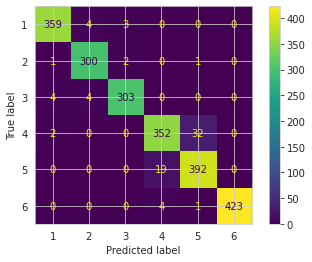

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test)  
plt.show()